# Vector Calculus Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym
#%matplotlib notebook

# Problem 1

<img src="Q1.png">

What is this question even asking?  Well, we can think of the integrand (i.e. $x^2 - y^2$) the $z$ value of a scalar function, which is in turn a function of both $x$ and $y$.  The integral is asking us to find the summed $area$ of a bunch of tiny rectangles whose height is the $z$ value and whose base is $ds$, the incremental distance as we move along the curve in the $x-y$ plane.  Let's visualize this by plotting the curve and the function.

From what we see below, it certainly appears like the value of this integral should be zero!  There is a symmetry to the curve that suggests that the positive and negative areas should cancel out.  Let's see if we can prove this mathematically.

The only real conceptually challenging part of this problem is to understand that the curve is parameterized by $t$, and thus the integral needs to be over $t$.

The curve is a circle of radius 4 centered at the origin, so we can parameterize it as $x = 4\cos(t)$, $y = 4\sin(t)$, where $t$ varies from 0 to $2\pi$.  The function is $x^2 - y^2$, so the integrand is $(4\cos(t))^2 - (4\sin(t))^2$.  The integral is then $\int_0^{2\pi} (4\cos(t))^2 - (4\sin(t))^2 dt$.  Let's evaluate this integral.

$$I = \int_0^{2\pi} (4\cos(t))^2 - (4\sin(t))^2 dt$$

$$I = \int_0^{2\pi} 16\cos^2(t) - 16\sin^2(t) dt$$

$$I = \int_0^{2\pi} 16(\cos^2(t) - \sin^2(t)) dt$$

$$I = \int_0^{2\pi} 16\cos(2t) dt$$

$$I = 8\sin(2t)\Big|_0^{2\pi}$$

$$I = 8(\sin(4\pi) - \sin(0))$$

$$I = 8(0 - 0) = 0$$

Text(0.5, 0.92, 'Curve and Function')

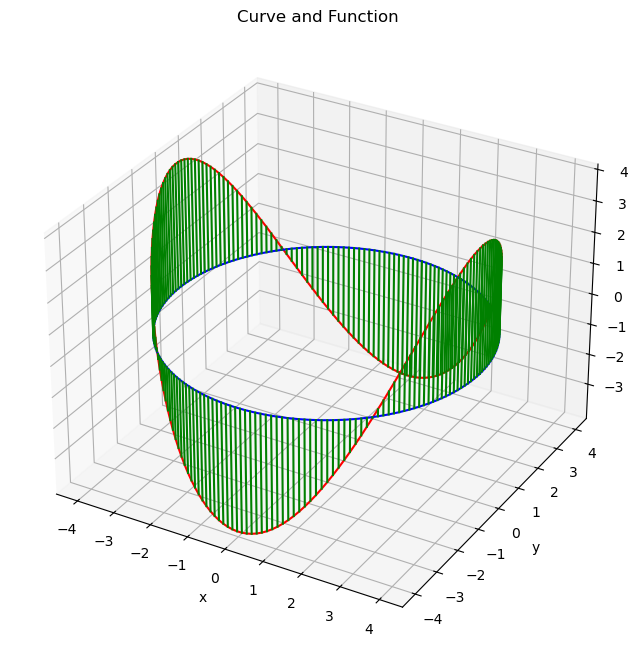

In [2]:
t = np.linspace(0,2*np.pi,200)
x = 4*np.cos(t)
y = 4*np.sin(t)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, 4*np.cos(t)**2 - 4*np.sin(t)**2, 'r')

# plot the curve in the x-y plane
ax.plot(x, y, 0*y, 'b')

# draw lines connecting the curve to the surface
for i in range(len(t)):
    ax.plot([x[i], x[i]], [y[i], y[i]], [0, 4*np.cos(t[i])**2 - 4*np.sin(t[i])**2], 'g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Curve and Function')


In [3]:
# Problem 1

t = sym.symbols('t')

x = 4*sym.cos(t)
y = 4*sym.sin(t)

function = x**2 - y**2
print('The function is: ')
sym.pprint(function.simplify())

integral = sym.integrate(function, (t, 0, 2*sym.pi))

print('The integral is: ')
sym.pprint(integral.simplify())

The function is: 
16⋅cos(2⋅t)
The integral is: 
0


# Problem 2

<img src="Q2.png">

What is this question asking?

Well, one can think of the integrand as the $z$ value of a scalar function, which is in turn a function of both $x$ and $y$.  The integral is asking us to find the summed $volume$ of a bunch of tiny rectangular cuboids whose height is the $z$ value and whose base is $dA=dx dy$, the incremental area as we move along the surface in the $x-y$ plane.  Let's visualize this by plotting the surface and the function.

Text(0.5, 0, 'z')

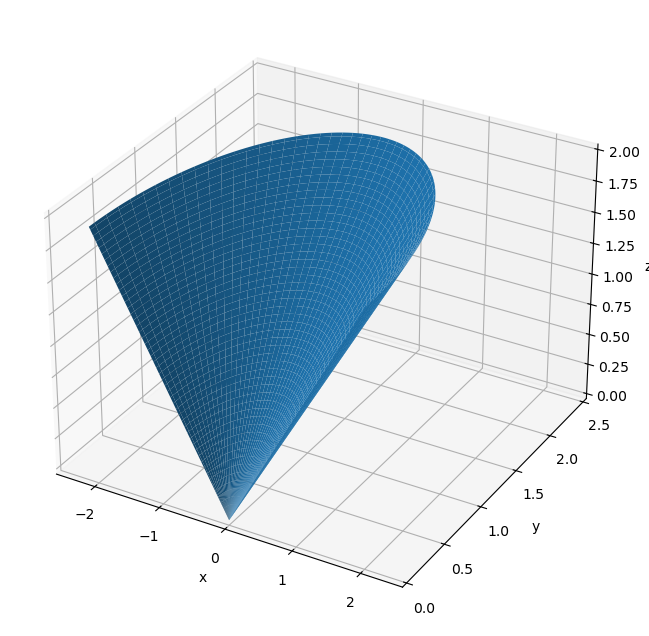

In [4]:
r = np.linspace(0, 2, 100)
theta = np.linspace(0, np.pi, 100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

R, T = np.meshgrid(r, theta)
X = R*np.cos(T)
Y = R*np.sin(T)
Z = np.sqrt(X**2 + Y**2)

ax.plot_surface(X, Y, Z, alpha=1.0)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(0, 2.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')




# Analytical Solution

It is clear that solving this integral in cylindrical coordinates is the way to go.  The function is $z = \sqrt{x^2 + y^2}$, so the integrand is $r$.  The limits of integration are $0 \leq r \leq 2$ and $0 \leq \theta \leq \pi$.  The integral is then $\int_0^{2} \int_0^{\pi} r r dr d\theta$.  Let's evaluate this integral.

$$I = \int_0^{2} \int_0^{\pi} r^2 dr d\theta$$

$$I = \int_0^{2} \frac{r^3}{3}\Big|_0^{\pi} d\theta$$

$$I = \int_0^{2} \frac{8}{3} d\theta$$

$$I = \frac{8}{3}\theta\Big|_0^{\pi}$$

$$I = \frac{8}{3}\pi$$

The function is: 
r


(0.0, 3.0)

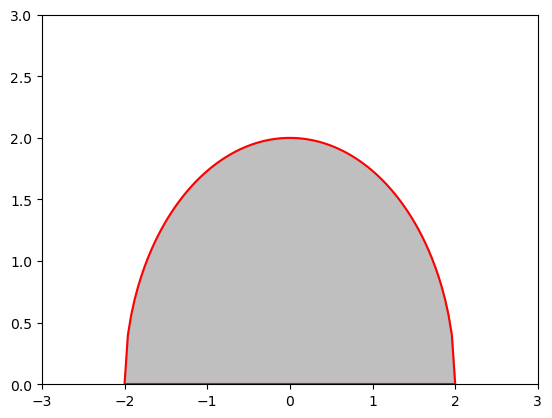

In [5]:
# Problem 2

r = sym.symbols('r', positive=True)
theta = sym.symbols('theta')

x = r*sym.cos(theta)
y = r*sym.sin(theta)

function = sym.sqrt(x**2 + y**2)
print('The function is: ')
sym.pprint(function.simplify())

# limits of integration: draw the region
xregion = np.linspace(-2, 2, 100)
yregion_upper = np.sqrt(4 - xregion**2)
yregion_lower = 0*xregion

plt.plot(xregion, yregion_upper, 'r')
plt.plot(xregion, yregion_lower, 'r')
plt.fill_between(xregion, yregion_upper, yregion_lower, color='gray', alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(0, 3)

In [6]:
r_lower_limit = 0
r_upper_limit = 2
theta_lower_limit = 0
theta_upper_limit = sym.pi

integral = sym.integrate(r*function, (r, r_lower_limit, r_upper_limit), (theta, theta_lower_limit, theta_upper_limit))

print('The integral is: ')
sym.pprint(integral.simplify())

The integral is: 
8⋅π
───
 3 


# Problem 3

<img src="Q3.png">

Since we have a nice diagram for this question, it is easy to see what is being asked.  We are trying to find integral of the function over the area of the shaded region.

Again, solving this problem in polar coordinates is the way to go. 

We are going to integrate $\theta$ from 0 to $\pi/2$ and $r$ from $4\sin(\theta)$ to 4.  The integrand is $(x+y) = (r \cos(\theta) + r \sin(\theta)$.  Let's evaluate this integral.

$$I = \int_0^{\pi/2} \int_{4\sin(\theta)}^{4} (r \cos(\theta) + r \sin(\theta) r dr d\theta$$

$$I = \int_0^{\pi/2} \int_{4\sin(\theta)}^{4} r^2 (\cos(\theta) + \sin(\theta)) dr d\theta$$

$$I = \int_0^{\pi/2} (\cos(\theta) + \sin(\theta)) \frac{r^3}{3}\Big|_{4\sin(\theta)}^{4} d\theta$$

$$I = \int_0^{\pi/2} (\cos(\theta) + \sin(\theta)) \left( \frac{64}{3} - \frac{64\sin^3(\theta)}{3} \right) d\theta$$

$$I = \int_0^{\pi/2} \left( \frac{64}{3}\cos(\theta) + \frac{64}{3}\sin(\theta) - \frac{64\sin^3(\theta)}{3}\cos(\theta) - \frac{64\sin^3(\theta)}{3}\sin(\theta) \right) d\theta$$

$$I = \frac{64}{3} \left( \int_0^{\pi/2} \cos(\theta) d\theta + \int_0^{\pi/2} \sin(\theta) d\theta - \int_0^{\pi/2} \sin^3(\theta)\cos(\theta) d\theta - \int_0^{\pi/2} \sin^4(\theta)d\theta \right)$$

Looking at these four integrals in turn, we have:

$$\int_0^{\pi/2} \cos(\theta) d\theta = \sin(\theta)\Big|_0^{\pi/2} = 1$$

$$\int_0^{\pi/2} \sin(\theta) d\theta = -\cos(\theta)\Big|_0^{\pi/2} = 1$$

$$\int_0^{\pi/2} \sin^3(\theta)\cos(\theta) d\theta = -\frac{1}{4}\cos^4(\theta)\Big|_0^{\pi/2} = \frac{1}{4}$$

$$\int_0^{\pi/2} \sin^4(\theta) d\theta = \frac{3\pi}{16}~(using Wolfram Alpha)$$

So, the integral is:

$$I = \frac{64}{3} \left( 1 + 1 - \frac{1}{4} - \frac{3\pi}{16} \right) = \frac{64}{3} \left( \frac{7}{4} - \frac{3\pi}{16} \right) = \frac{112}{3} - \frac{192\pi}{48} = \frac{112}{3} - 4\pi$$

In [7]:
# Problem 3

r = sym.symbols('r', positive=True)
theta = sym.symbols('theta')

x = r*sym.cos(theta)
y = r*sym.sin(theta)

function = x+y

r_lower_limit = 4*sym.sin(theta)
r_upper_limit = 4
theta_lower_limit = 0
theta_upper_limit = sym.pi/2

integral = sym.integrate(r*function, (r, r_lower_limit, r_upper_limit), (theta, theta_lower_limit, theta_upper_limit))

print('The integral is: ')
sym.pprint(integral.simplify())

The integral is: 
112/3 - 4⋅π


# Problem 4

<img src="Q4.png">

In [8]:
# Problem 4
%matplotlib notebook

npts = 25

# Define the cylindrical region
x = np.linspace(0, 4, npts)
y = np.linspace(0, 2, npts)
z = np.sqrt(4 - y**2)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(4 - Y**2)

# Define the plane y = 0
x_plane = np.linspace(0, 4, npts)
z_plane = np.linspace(0, 2, npts)
XP1, ZP1 = np.meshgrid(x_plane, z_plane)
YP1 = 0*X

# Define the plane z = 0
x_plane2 = np.linspace(0, 4, npts)
y_plane2 = np.linspace(0, 2, npts)
XP2, YP2 = np.meshgrid(x_plane2, y_plane2)
ZP2 = 0*X

# Define the F vector field
def F(x, y, z):
    return np.array([x, 5*z, y])

# Define the normal vector to the surface
def normal_vector(x, y, z):
    return np.array([0*x, np.cos(np.arctan2(z, y)), np.sin(np.arctan2(z, y))])


# Plot the region
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)
ax.plot_surface(XP1, YP1, ZP1, alpha=0.5)
ax.plot_surface(XP2, YP2, ZP2, alpha=0.5)
ax.quiver(X, Y, Z, F(X, Y, Z)[0], F(X, Y, Z)[1], F(X, Y, Z)[2], length=0.3, normalize=True)
ax.quiver(X, Y, Z, normal_vector(X, Y, Z)[0], normal_vector(X, Y, Z)[1], normal_vector(X, Y, Z)[2], length=0.15, normalize=True, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Region of Integration')

<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'Region of Integration')

# Analytical Solution

The surface of the cylindrical portion is described by:

$$x = x$$
$$y = 2\cos(\theta)$$
$$z = 2\sin(\theta)$$

where $\theta$ varies from 0 to $\pi/2$.

Thus, over the cylindrical surface, the normal vector is $(0, \cos(\theta), \sin(\theta))$, where $\theta$ varies from 0 to $\pi/2$.

Now, over the surface, the function is $(x,5z,y) = (x,5*2\sin(\theta),2\cos(\theta))$.

Therefore, $F \cdot \hat{n} = 0 + 10\sin(\theta)\cos(\theta) + 2\cos(\theta)\sin(\theta) = 12\sin(\theta)\cos(\theta)$.

The differential area is $r dx d\theta = 2 dx d\theta$.

The integral is then:

$$I = \int_0^{4} \int_0^{\pi/2} 12\sin(\theta)\cos(\theta) 2 dx d\theta$$

$$I = \int_0^{4} \int_0^{\pi/2} 24\sin(\theta)\cos(\theta) dx d\theta$$

$$I = \int_0^{4} 24 \int_0^{\pi/2} \sin(\theta)\cos(\theta) d\theta dx$$

$$I = 24 \int_0^{4} \frac{1}{2}\sin(2\theta)\Big|_0^{\pi/2} dx$$

$$I = 24 \int_0^{4} \frac{1}{2} dx$$

$$I = 12 x\Big|_0^{4} = 48$$

In [9]:
theta = sym.symbols('theta')
x = sym.symbols('x')

integral = sym.integrate(24*sym.sin(theta)*sym.cos(theta), (x,0,4), (theta, 0, sym.pi/2))

print('The integral is: ')
sym.pprint(integral.simplify())

The integral is: 
48


# Problem 5

<img src="Q5.png">

Stokes Theorem states that the line integral of a vector field F around a closed curve C is equal to the surface integral of the curl of F over the surface S enclosed by C.  So, for this problem, the point is to evaluate the line integral of F around the curve C, as presumably that is easier.

Let's begin by drawing the surface and the curve

In [10]:
# Define the region
radius_square = 169
offset = 12

npts = 100

def r(r, phi, theta, offset):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)-offset
    return x, y, z

# Plot the surface
phi = np.linspace(0, 2*np.pi, npts)
theta = np.linspace(0, np.pi, npts)
radius = np.sqrt(radius_square)
Phi, Theta = np.meshgrid(phi, theta)
X, Y, Z = r(radius, Phi, Theta, offset)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface S')

# Plot the z=0 plane
x = np.linspace(-13, 13, npts)
y = np.linspace(-13, 13, npts)
X, Y = np.meshgrid(x, y)
Z = 0*X
ax.plot_surface(X, Y, Z, alpha=0.5)

# Plot the curve
theta = np.linspace(0, 2*np.pi, npts)
new_radius = np.sqrt(radius_square - offset**2)
xint = new_radius*np.cos(theta)
yint = new_radius*np.sin(theta)

ax.plot(xint, yint, 0*x, 'r')

ax.set_xlim(-13, 13)
ax.set_ylim(-13, 13)
ax.set_zlim(-2, 2)


<IPython.core.display.Javascript object>

(-2.0, 2.0)

# Evaluate the line integral of F around the curve C

Subsituting z = 0, we get $x^2 + y^2 = 169-144= 25$, so the curve is a circle of radius 5 centered at the origin in the z=0 plane

The curve is a circle of radius 5, centered at the origin, in the z=0 plane. So, on this curve, $x = 5\cos(\theta)$, $y = 5\sin(\theta)$, $z = 0$, where $\theta$ varies from $0 to 2*\pi$

The $dr$ vector (which is tangent to the curve) is $(-5\sin(\theta), 5\cos(\theta), 0)$

The $F$ vector is $(y, y-x, 0)$ = $(5\sin(\theta), 5\sin(\theta)-5\cos(\theta), 0)$.

The dot product of F and dr is $-25\sin(\theta) \sin(\theta) - 25\cos(\theta) \cos(\theta) + 25\cos(\theta) \sin(\theta)$

The integral is then:

$$I = \int_0^{2\pi} -25\sin(\theta) \sin(\theta) - 25\cos(\theta) \cos(\theta) + 25\cos(\theta) \sin(\theta) d\theta$$

$$I = \int_0^{2\pi} -25\sin^2(\theta) - 25\cos^2(\theta) + 25\cos(\theta) \sin(\theta) d\theta$$

$$I = \int_0^{2\pi} -25 + 25\cos(\theta) \sin(\theta) d\theta$$

$$I = - \int_0^{2\pi} 25 d\theta + \frac{25}{2} \int_0^{2\pi} \sin(2\theta) d\theta$$

$$I = -50\pi + \frac{25}{2} \left( -\frac{1}{2} \cos(2\theta) \right)\Big|_0^{2\pi}$$

$$I = -50\pi + \frac{25}{2} \left( -\frac{1}{2} + \frac{1}{2} \right)$$

$$I = -50\pi + \frac{25}{2} \left( 0 \right)$$

$$I = -50\pi$$


In [11]:
theta = sym.symbols('theta')

integral1 = sym.integrate(-25*sym.sin(theta)*sym.sin(theta), (theta, 0, 2*sym.pi))

integral2 = sym.integrate(-25*sym.cos(theta)*sym.cos(theta), (theta, 0, 2*sym.pi))

integral3 = sym.integrate(25*sym.cos(theta)*sym.sin(theta), (theta, 0, 2*sym.pi))

print('The sub-integrals are: ')
sym.pprint(integral1.simplify())
sym.pprint(integral2.simplify())
sym.pprint(integral3.simplify())

integral = integral1 + integral2 + integral3

print('The integral is: ')
sym.pprint(integral.simplify())


The sub-integrals are: 
-25⋅π
-25⋅π
0
The integral is: 
-50⋅π


# Problem 6

<img src="Q6.png">

The original curves are:

$$y = x^2 + z^2$$
$$y = C - x^2 - z^2$$

where $C$ is a constant.

These curves are called parabloids, and they are symmetric about the y-axis. 

The intersection points are the solutions to the system of equations:

$$x^2 + z^2 = C - x^2 - z^2$$

$$2x^2 + 2z^2 = C$$

$$x^2 + z^2 = C/2$$

So, the intersection points are the points on the circle of radius $\sqrt{\frac{C}{2}}$ centered at the origin
at the intersection of the plane $y = \frac{C}{2}$ and the two paraboloids.

Let's plot the curves and the intersection points


In [12]:
C = 18
x = sym.symbols('x')
z = sym.symbols('z')

y1 = x**2 + z**2
y2 = C - x**2 - z**2

# Define the region
x = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)
X, Z = np.meshgrid(x, z)
Y1 = X**2 + Z**2
Y2 = C - X**2 - Z**2

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y1, Z, alpha=0.3)
ax.plot_surface(X, Y2, Z, alpha=0.3)

# Plot the intersection points
theta = np.linspace(0, 2*np.pi, 100)
xint = np.sqrt(C/2)*np.cos(theta)
zint = np.sqrt(C/2)*np.sin(theta)

ax.plot(xint, C/2*np.ones(100), zint, 'r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Curves y = x^2 + z^2 and y = C - x^2 - z^2')


<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'Curves y = x^2 + z^2 and y = C - x^2 - z^2')

# Analytical Solution

The volume of the overlap region is symmetric, so we can just find the volume of one half of the overlap region and multiply by 2.

Let's find the volume of the paraboloid $y = x^2 + z^2$ between $y = 0$ and $y = \frac{C}{2}$, since that seems easier.

The volume is given by the triple integral of 1 over the region.

The easiest method here is to add up the volume of a series of disks of thickness $dy$, where $y$ varies from 0 to $\frac{C}{2}$.

The volume of each disk is $\pi(r(y)^2)dy$, where $r(y)$ is the radius of the disk at height $y$, which is $\sqrt{y}$.

So, the volume is the integral of $\pi y dy$ from 0 to $\frac{C}{2}$.

Evaluate this integral (and multiply by 2) to get the volume of the overlap region:

$$I = 2 \int_0^{C/2} \pi y dy$$

$$I = 2 \pi \frac{y^2}{2}\Big|_0^{C/2}$$

$$I = 2 \pi \frac{C^2}{8}$$

$$I = \frac{\pi C^2}{4}$$

Substitute $C = 18$ to get the final answer:

$$I = \frac{18^2 \pi}{4} = 81 \pi$$

In [13]:
y = sym.symbols('y')

integral = sym.integrate(sym.pi*y, (y, 0, C/2))

print('The integral is: ')
sym.pprint(integral.simplify())

# The volume of the overlap region is 2*integral

print('The volume of the overlap region is: ')
sym.pprint(2*integral.simplify())

The integral is: 
40.5⋅π
The volume of the overlap region is: 
81.0⋅π
